In [1]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# laoding the iris data

iris = load_iris()

# features -> x
# response -> y

x = iris.data
y = iris.target

In [4]:
# 10-fold cross_validation with K=5 for KNN (the n_neighbors parameter)
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, x, y, cv = 10, scoring = "accuracy")
print(scores)

[ 1.          0.93333333  1.          1.          0.86666667  0.93333333
  0.93333333  1.          1.          1.        ]


In [6]:
print(scores.mean())

0.966666666667


In [8]:
#Searching for the optimal value of K for KNN
k_range = range(1,31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x, y, cv= 10, scoring ="accuracy")
    k_scores.append(scores.mean())
print(k_scores)

[0.95999999999999996, 0.95333333333333337, 0.96666666666666656, 0.96666666666666656, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.98000000000000009, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.98000000000000009, 0.97333333333333338, 0.98000000000000009, 0.96666666666666656, 0.96666666666666656, 0.97333333333333338, 0.95999999999999996, 0.96666666666666656, 0.95999999999999996, 0.96666666666666656, 0.95333333333333337, 0.95333333333333337, 0.95333333333333337]


Text(0,0.5,'Cross-Validated accuracy')

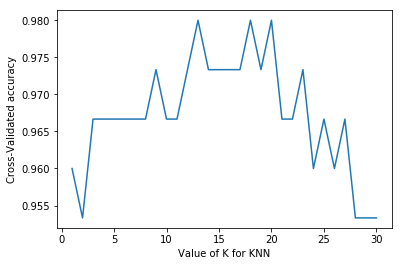

In [9]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel("Value of K for KNN")
plt.ylabel("Cross-Validated accuracy")


# Efficient Parameter Tuning using GridSearchCV

Allows to define a grid of parameters that will be  searched using K-Fold cross_validation

In [10]:
from sklearn.grid_search import GridSearchCV


In [29]:
# define the parameter values that should be searched
k_range = range(1,31)
k_range = list(k_range)
print(type(k_range))

<class 'list'>


In [30]:
# create a parameter grid: map the parameter names to the values that should be
# searched 

param_grid = dict(n_neighbors = k_range)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [31]:
# Instantiate the grid 
grid = GridSearchCV(knn, param_grid, cv = 10, scoring = "accuracy")

    # We can set n_jobs = -1 to run computations in parallel

In [32]:
grid.fit(x, y)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=30, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [33]:
grid.grid_scores_

[mean: 0.96000, std: 0.05333, params: {'n_neighbors': 1},
 mean: 0.95333, std: 0.05207, params: {'n_neighbors': 2},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 3},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 4},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 5},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 6},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 7},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 8},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 9},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 10},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 11},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 12},
 mean: 0.98000, std: 0.03055, params: {'n_neighbors': 13},
 mean: 0.97333, std: 0.04422, params: {'n_neighbors': 14},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 15},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 16},
 mean: 0.97333, std: 0.03266, params: {'n_neighbors': 17},
 mean:

In [34]:
print(grid.grid_scores_[0].parameters)
print(grid.grid_scores_[0].cv_validation_scores)
print(grid.grid_scores_[0].mean_validation_score)

{'n_neighbors': 1}
[ 1.          0.93333333  1.          0.93333333  0.86666667  1.
  0.86666667  1.          1.          1.        ]
0.96


In [36]:
# create a list of the mean scores only

grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]
grid_mean_scores

[0.96,
 0.9533333333333334,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9733333333333334,
 0.9666666666666667,
 0.9666666666666667,
 0.9733333333333334,
 0.98,
 0.9733333333333334,
 0.9733333333333334,
 0.9733333333333334,
 0.9733333333333334,
 0.98,
 0.9733333333333334,
 0.98,
 0.9666666666666667,
 0.9666666666666667,
 0.9733333333333334,
 0.96,
 0.9666666666666667,
 0.96,
 0.9666666666666667,
 0.9533333333333334,
 0.9533333333333334,
 0.9533333333333334]

Text(0,0.5,'Cross-Validated Accuracy')

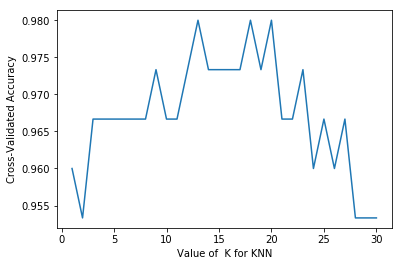

In [37]:
# plot the results
plt.plot(k_range, grid_mean_scores)
plt.xlabel("Value of  K for KNN")
plt.ylabel("Cross-Validated Accuracy")

In [38]:
# examine the best model

print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.98
{'n_neighbors': 13}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform')


# Searching Multiple Parameters Siultaneously

Example : tuning max_depth and min_samples_leaf for a DecisionTreeClassifier
Could tune parameters independently: change max_depth while leaving min_samples_leaf at its default value, vice versa

But, best performance might not be achieved when neither parameter is at its default value

In [50]:
# define the parameter values that should be searched

k_range = list(range(1, 31))
weight_options = ["uniform", "distance"]
type(k_range)

list

In [51]:
# create a parameter grid: map the parameter to the values that should be searched
param_grid = dict(n_neighbors = k_range, weights = weight_options)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']}


In [52]:
# instantiate and fit the grid
grid = GridSearchCV(knn, param_grid, cv = 10, scoring = "accuracy")
grid.fit(x, y)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=30, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [54]:
# the complete results
grid.grid_scores_

[mean: 0.96000, std: 0.05333, params: {'n_neighbors': 1, 'weights': 'uniform'},
 mean: 0.96000, std: 0.05333, params: {'n_neighbors': 1, 'weights': 'distance'},
 mean: 0.95333, std: 0.05207, params: {'n_neighbors': 2, 'weights': 'uniform'},
 mean: 0.96000, std: 0.05333, params: {'n_neighbors': 2, 'weights': 'distance'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 3, 'weights': 'uniform'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 3, 'weights': 'distance'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 4, 'weights': 'uniform'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 4, 'weights': 'distance'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 5, 'weights': 'uniform'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 5, 'weights': 'distance'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 6, 'weights': 'uniform'},
 mean: 0.96667, std: 0.04472, params: {'n_neighbors': 6, 'weights': 'distance'},
 mean: 0.96667, std: 0.04472, para

In [56]:
print(grid.best_score_)
print(grid.best_params_)

0.98
{'n_neighbors': 13, 'weights': 'uniform'}


# Using the best parameters to make predictions

In [57]:
# train the model using all data and the best known parameters
knn = KNeighborsClassifier(n_neighbors=13, weights="uniform")
knn.fit(x, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform')

In [59]:
#make a prediction on out-of-sample data
knn.predict([[3,5,4,2]])

array([1])

In [61]:
grid.predict([[3,5,4,2]])

array([1])

# Reducing computational expense using RandomizedSearchCV

Searching mainy different parameters at once may be computationally infeasible

RandomizedSearchCV  searches a subset of the parameters, and we control the computational "budget"

In [62]:
from sklearn.grid_search import RandomizedSearchCV

In [63]:
# specify "parameter distributions" rather than a "parameter grid"
param_dist = dict(n_neighbors = k_range, weights = weight_options)

Important: Specify a continious distribution (rather than a list of values) for
any continous parameters

In [65]:
# n_iter controls the number of searches
rand = RandomizedSearchCV(knn, param_dist, cv = 10, scoring = "accuracy",
                         random_state = 5)
rand.fit(x, y)
rand.grid_scores_

[mean: 0.97333, std: 0.03266, params: {'weights': 'distance', 'n_neighbors': 16},
 mean: 0.96667, std: 0.03333, params: {'weights': 'uniform', 'n_neighbors': 22},
 mean: 0.98000, std: 0.03055, params: {'weights': 'uniform', 'n_neighbors': 18},
 mean: 0.96667, std: 0.04472, params: {'weights': 'uniform', 'n_neighbors': 27},
 mean: 0.95333, std: 0.04269, params: {'weights': 'uniform', 'n_neighbors': 29},
 mean: 0.97333, std: 0.03266, params: {'weights': 'distance', 'n_neighbors': 10},
 mean: 0.96667, std: 0.04472, params: {'weights': 'distance', 'n_neighbors': 22},
 mean: 0.97333, std: 0.04422, params: {'weights': 'uniform', 'n_neighbors': 14},
 mean: 0.97333, std: 0.04422, params: {'weights': 'distance', 'n_neighbors': 12},
 mean: 0.97333, std: 0.03266, params: {'weights': 'uniform', 'n_neighbors': 15}]

In [66]:
# examine the best model
print(rand.best_score_)
print(rand.best_params_)

0.98
{'weights': 'uniform', 'n_neighbors': 18}


In [68]:
# run RandomizedSearchCV 20 times (with n_iter = 10) and record the best score

best_scores = []

for _ in range(20):
    rand = RandomizedSearchCV(knn, param_dist, cv = 10, scoring = "accuracy", 
                              n_iter = 10)
    rand.fit(x, y)
    best_scores.append(round(rand.best_score_, 3))
print(best_scores)

[0.98, 0.98, 0.98, 0.98, 0.98, 0.973, 0.98, 0.98, 0.973, 0.98, 0.973, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.973, 0.98]


# Resources

Data School --> How to find the best model parameters in scikit-learn